# Class 12 - August 14th Notes

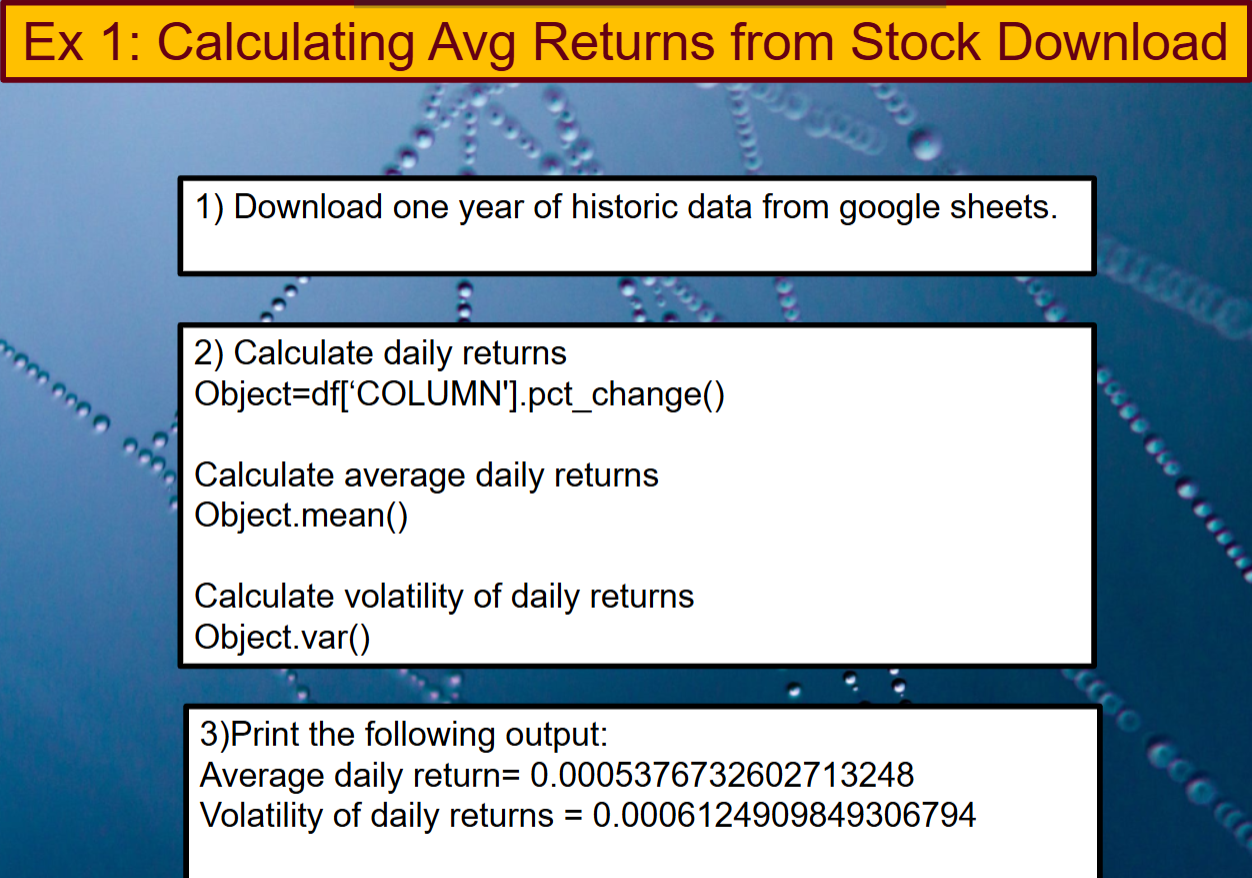

In [64]:
import pandas as pd

def returns1():
    df = pd.read_csv("WMT 2020 - Today - Sheet1.csv")
    df["Date_Split"] = df["Date"].str.split().str[0]
    df.drop(columns="Date", inplace=True)
    df = df.set_index("Date_Split")
    df = df.reset_index()

    df["daily%"] = df["Close"].pct_change()
    df.dropna(subset=["daily%"], inplace=True)

    mean_daily_WMT = df["daily%"].mean()
    vol_daily_WMT = df["daily%"].var()
    # print(mean_daily_WMT)
    # print(vol_daily_WMT)
    return [df, mean_daily_WMT, vol_daily_WMT]

def main():
    x = returns1()
    # print(x)
    print(x[0])
    print(x[1])
    print(x[2])

main()

     Date_Split   Close    daily%
1      1/3/2020   39.30 -0.008827
2      1/6/2020   39.22 -0.002036
3      1/7/2020   38.85 -0.009434
4      1/8/2020   38.72 -0.003346
5      1/9/2020   39.12  0.010331
...         ...     ...       ...
1406   8/7/2025  103.12 -0.002322
1407   8/8/2025  103.73  0.005915
1408  8/11/2025  103.93  0.001928
1409  8/12/2025  103.62 -0.002983
1410  8/13/2025  100.99 -0.025381

[1410 rows x 3 columns]
0.0007690410804313797
0.00021179156168236264


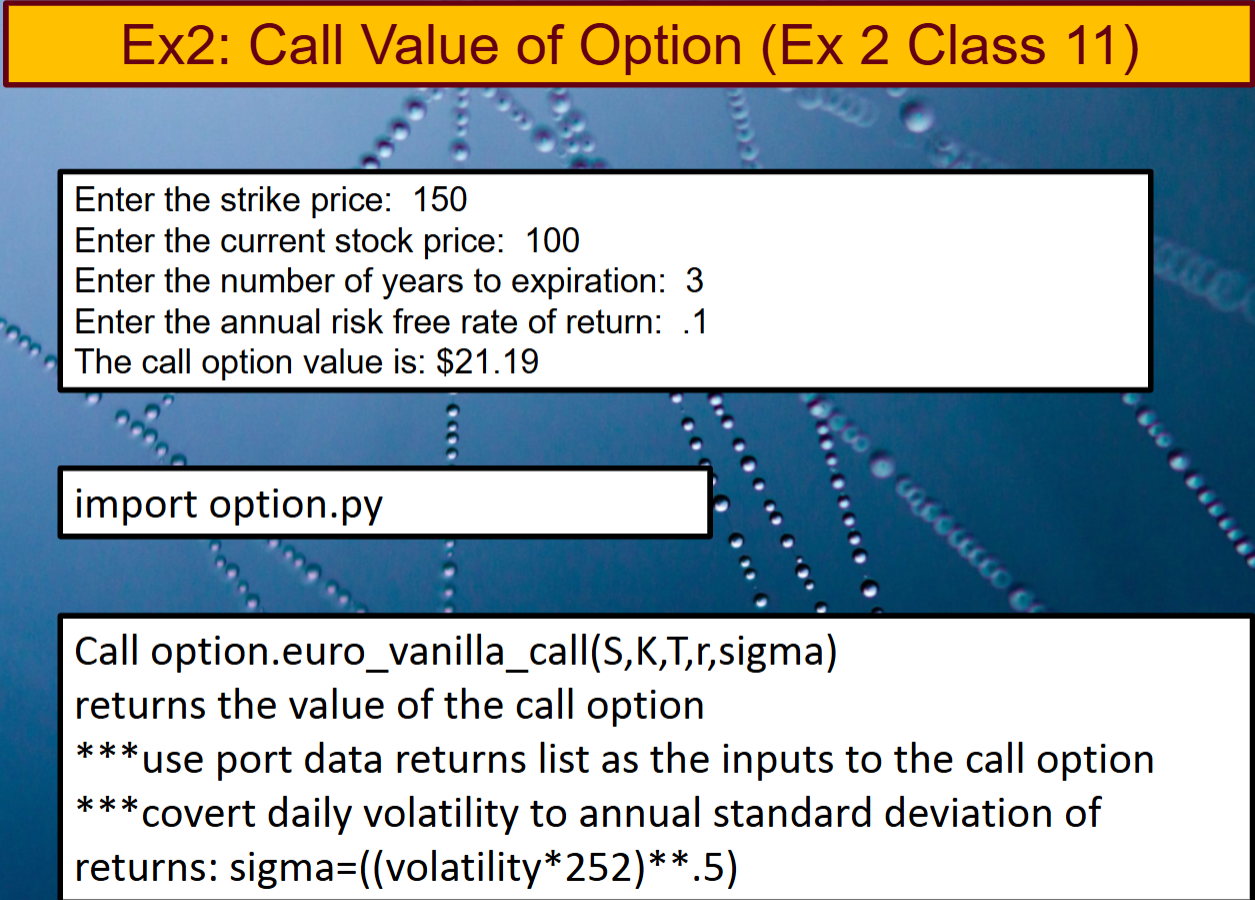

In [65]:
import pandas as pd  
import option

###Ex 1, modified to return list here
def returns(S, K, T, r, sigma):
    x = option.euro_vanilla_call(S, K, T, r, sigma)
    return x


def main():
    # K= float(input("Enter the strike price: "))
    # S= float(input("Enter the current stock price: "))
    # T=float(input("Enter the number of years to expiration: "))
    # r=float(input("Enter the annual risk free rate of return: "))
    K = 5
    S = 5
    T = 5
    r = 0.5
    
    ###Call returns, returncassign vol to volatility
    
    x = returns1()
    # print(x[2])
    vol_daily_WMT = x[2]
    sigma=((vol_daily_WMT*252)**.5)
    value=float(returns(S, K, T, r, sigma))
    print("The call option value is: $",format(value,'.2f'),sep='')
   
main()


The call option value is: $4.59


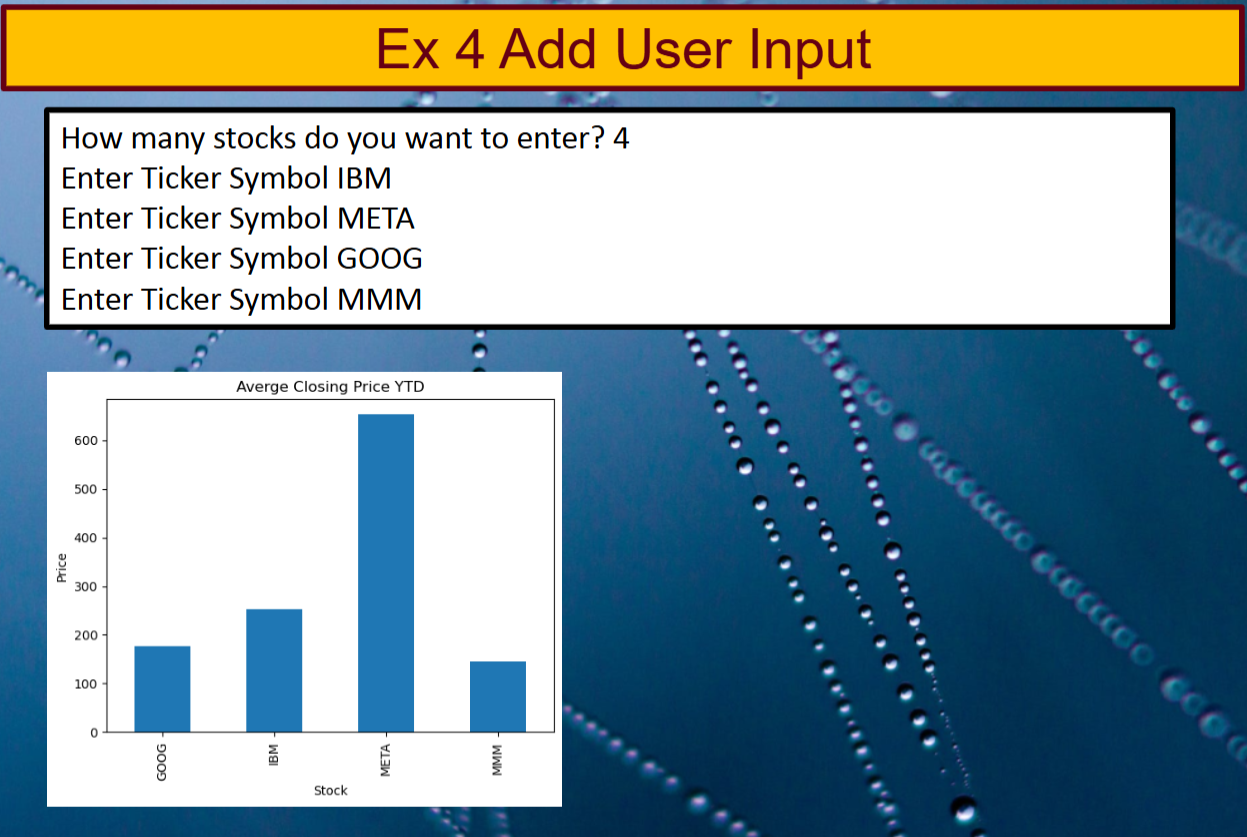

Enter company 1: MMM
Enter company 1: F
MMM F 


C:\Users\rohil\AppData\Local\Temp\ipykernel_25992\1633868776.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stocks = yf.download(input_str, period="ytd",multi_level_index=False)
[*********************100%***********************]  2 of 2 completed


Text(0, 0.5, 'Price')

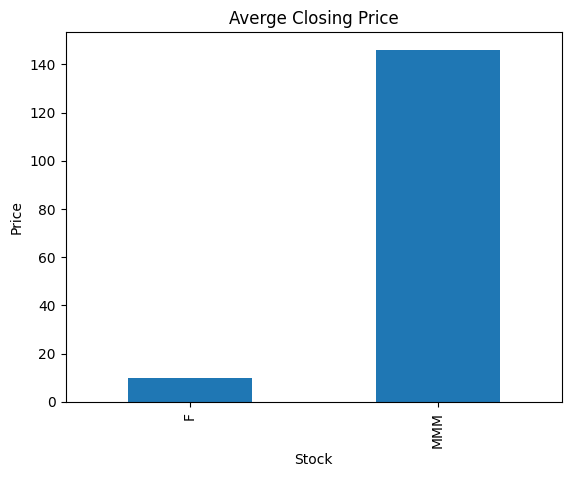

In [100]:
import yfinance as yf
import matplotlib.pyplot as plt

input_str = ""
n = int(input("Enter the number of companies: "))
for i in range(n):
    comp1 = input("Enter company 1: ").strip(" ").upper()
    print("Enter company 1: {}".format(comp1))
    input_str = input_str + comp1 + " "

print(input_str)

stocks = yf.download(input_str, period="ytd",multi_level_index=False)
avgcl = stocks['Close'].mean()
avgcl.plot.bar()
plt.title('Averge Closing Price')
plt.xlabel('Stock')
plt.ylabel('Price')

## Practise

In [60]:
import pandas as pd

df = pd.read_csv("IBM Sheet.csv")
df["Date_Split"] = df["Date"].str.split().str[0]
df.drop(columns="Date", inplace=True)
df = df.set_index("Date_Split")
df = df.reset_index()

df["daily%"] = df["Close"].pct_change()
df.dropna(subset=["daily%"], inplace=True)

mean_daily = df["daily%"].mean()
var_daily = df["daily%"].var()
print(mean_daily)
print(var_daily)

0.0005900833449393913
0.0003019448483622254


In [34]:
df

,Date_Split,Close,daily%
1,1/3/2020,128.32,-0.007963
2,1/6/2020,128.09,-0.001792
3,1/7/2020,128.17,0.000625
4,1/8/2020,129.24,0.008348
5,1/9/2020,130.61,0.010600
...,...,...,...
1406,8/7/2025,250.16,-0.008403
1407,8/8/2025,242.27,-0.031540
1408,8/11/2025,236.30,-0.024642
1409,8/12/2025,234.77,-0.006475


In [66]:
###Demo1 Yahoo!Finance
import yfinance as yf

###Ticker is a module that contains all of the data related to MSFT
msft = yf.Ticker("MSFT")


# get historical market data
hist = msft.history(start="2022-01-01", end="2022-04-30")

###or
hist1 = msft.history(period='1y')

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,325.620654,328.193765,320.212247,325.038055,28865100,0.0,0.0
2022-01-04 00:00:00-05:00,325.115693,325.474983,316.658401,319.464569,32674300,0.0,0.0
2022-01-05 00:00:00-05:00,316.405962,316.609890,306.812630,307.201019,40054300,0.0,0.0
2022-01-06 00:00:00-05:00,304.064789,309.453788,302.452946,304.773621,39646100,0.0,0.0
2022-01-07 00:00:00-05:00,305.035719,307.317546,301.093512,304.928925,32720000,0.0,0.0
...,...,...,...,...,...,...,...
2022-04-25 00:00:00-04:00,265.909874,273.518674,263.457907,273.139221,35678900,0.0,0.0
2022-04-26 00:00:00-04:00,270.006195,270.842957,262.708730,262.922791,46518400,0.0,0.0
2022-04-27 00:00:00-04:00,274.481997,283.112461,271.621388,275.571747,63477700,0.0,0.0


In [67]:
hist1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-14 00:00:00-04:00,411.643939,414.541735,409.311844,413.688263,18267000,0.00,0.0
2024-08-15 00:00:00-04:00,417.356768,418.659141,415.229238,418.579620,20752100,0.75,0.0
2024-08-16 00:00:00-04:00,418.152124,418.887807,414.871311,416.034515,22775600,0.00,0.0
2024-08-19 00:00:00-04:00,416.521671,419.295442,414.036221,419.076721,15234000,0.00,0.0
2024-08-20 00:00:00-04:00,419.245764,423.381526,419.186115,422.327698,16387600,0.00,0.0
...,...,...,...,...,...,...,...
2025-08-08 00:00:00-04:00,522.599976,524.659973,519.409973,522.039978,15531000,0.00,0.0
2025-08-11 00:00:00-04:00,522.299988,527.590027,519.719971,521.770020,20194400,0.00,0.0
2025-08-12 00:00:00-04:00,523.750000,530.979980,522.700012,529.239990,18667000,0.00,0.0


In [78]:
#Demo 2
import yfinance as yf
### or can get data using download function, can call multiple ticker symbols
# data = yf.download("IBM TSLA CRM", period="ytd")
data = yf.download("IBM", period="ytd", multi_level_index=False)
###Will want to add arguement multi_level_index=False
data

C:\Users\rohil\AppData\Local\Temp\ipykernel_25992\2924800957.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("IBM", period="ytd", multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2025-01-02,215.582550,218.082032,213.288914,217.425308,2579500
2025-01-03,218.238846,219.228845,216.180460,216.180460,3872100
2025-01-06,218.258453,219.905177,216.376494,218.581917,2846700
2025-01-07,219.522903,222.218420,218.415286,218.924988,3299300
2025-01-08,218.758347,220.444271,216.454914,219.473895,2619800
...,...,...,...,...,...
2025-08-08,242.270004,249.479996,241.649994,248.880005,6828400
2025-08-11,236.300003,243.149994,234.699997,242.240005,9382000
2025-08-12,234.770004,237.960007,233.360001,236.529999,8792800


C:\Users\rohil\AppData\Local\Temp\ipykernel_25992\157239648.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stocks = yf.download("IBM TSLA META", period="ytd",multi_level_index=False)
[*********************100%***********************]  3 of 3 completed


Text(0, 0.5, 'Price')

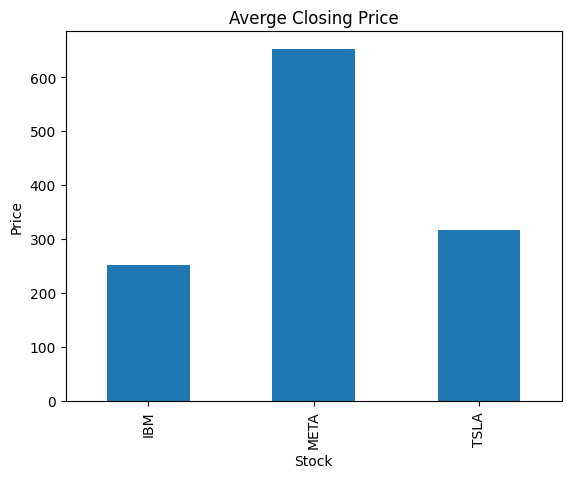

In [81]:
import yfinance as yf
import matplotlib.pyplot as plt
stocks = yf.download("IBM TSLA META", period="ytd",multi_level_index=False)
avgcl = stocks['Close'].mean()
avgcl.plot.bar()
plt.title('Averge Closing Price')
plt.xlabel('Stock')
plt.ylabel('Price')

In [10]:
import pandas as pd

df = pd.read_csv("IBM Sheet.csv")
df["Date"][2]

'1/6/2020 16:00:00'

In [6]:
df.head(5)

,Date,Close
0,1/2/2020 16:00:00,129.35
1,1/3/2020 16:00:00,128.32
2,1/6/2020 16:00:00,128.09
3,1/7/2020 16:00:00,128.17
4,1/8/2020 16:00:00,129.24
